In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
from heapq import heappop, heappush
%matplotlib inline

In [2]:
from search import *
from map import *
from heuristics import *
from definitions import *
import numpy as np
import pandas as pd

In [3]:
'''
Функция, принимающая map (карта), scen (задания) и iter, и применяющая a-star к каждому iter-ому заданию по всем
доступным эвристикам. Возвращает массивы:
nodes_norm[i] - набор нормализованных значений количества вершин для всех A* и WA* с заданными весами для текущего задания
steps_norm[i] - набор нормализованных значений количества шагов для всех A* и WA* с заданными весами для текущего задания
task_hard[i] - сложность текущего задания, вычисляется как длина кратчайшего пути
nodes[i] - набор не нормализованных значений количества вершин для всех A* и WA* с заданными весами для текущего задания
steps[i] - набор не нормализованных значений количества шагов для всех A* и WA* с заданными весами для текущего задания
task_len[i] - набор нормализованных длин найденных путей для всех A* и WA* с заданными весами для текущего задания
correct_tasks - подсчитывает количество найденных кратчайших путей для A* и WA* с заданными весами
'''
def count_complexity(task_map, scen, iter):
    nodes_norm = []
    nodes = []
    steps_norm = []
    steps = []
    task_n = 0
    task_hard = []
    task_len = []
    correct_tasks = [0, 0, 0, 0]
#     weights = [1.25, 1.5, 3, 5, 10]
#     distances = [manhattan_distance, chebyshev_distance, diagonal_distance, euclidean_distance]
    w = 3
    for i, task in enumerate(scen):
        if i % iter == 0:
            cur_task_nodes = []
            cur_task_steps = []
            cur_task_len = []
            task_n += 1
            
            result = astar(task_map, task[4], task[5], task[6], task[7], 1, diagonal_distance, SearchTreePQS, phi)
            number_of_steps = result[2]
            nodes_created = result[3]
            length = result[1].g
            correct = (length - task[8] < 0.01)
            if correct:
                correct_tasks[0] += 1
            cur_task_nodes.append(nodes_created)
            cur_task_steps.append(number_of_steps)
            task_hard.append(length)
            cur_task_len.append(length / task[8])
            
            for j in range(3):
                if j == 0:
                    result = astar(task_map, task[4], task[5], task[6], task[7], w, diagonal_distance, SearchTreePQS, phi)
                if j == 1:
                    result = astar(task_map, task[4], task[5], task[6], task[7], w,  diagonal_distance, SearchTreePQS, phi_xdp)
                if j == 2:
                    result = astar(task_map, task[4], task[5], task[6], task[7], w,  diagonal_distance, SearchTreePQS, phi_xup)
                number_of_steps = result[2]
                nodes_created = result[3]
                length = result[1].g
                correct = (length - task[8] < 0.01)
                if correct:
                    correct_tasks[j + 1] += 1
                cur_task_nodes.append(nodes_created)
                cur_task_steps.append(number_of_steps)
                cur_task_len.append(length / task[8])
                
            max_steps = max(cur_task_steps)
            max_nodes = max(cur_task_nodes)
            nodes.append(cur_task_nodes)
            steps.append(cur_task_steps)
            cur_task_nodes = [i / max_nodes for i in cur_task_nodes]
            cur_task_steps = [i / max_steps for i in cur_task_steps]
            task_len.append(cur_task_len)
            nodes_norm.append(cur_task_nodes)
            steps_norm.append(cur_task_steps)
            if i % (iter * 10) == 0:
                print("Going through task {}".format(i))
    print("Tasks: {}".format(task_n))
    return nodes_norm, steps_norm, task_hard, nodes, steps, task_len, correct_tasks

In [4]:
def draw_df(nodes_norm, steps_norm, correct_tasks, task_lens, tasks_num):
    df = pd.DataFrame(index=['correct', 'length', 'nodes_created', 'steps'])
    a_nodes = [i[0] for i in nodes_norm]
    a_steps = [i[0] for i in steps_norm]
    a_lens = [i[0] for i in task_lens]
    df["A*"] = [
        correct_tasks[0] / tasks_num,
        np.mean(a_lens),
        np.mean(a_nodes),
        np.mean(a_steps),
    ]
    
    w_nodes = [i[1] for i in nodes_norm]
    w_steps = [i[1] for i in steps_norm]
    w_lens = [i[1] for i in task_lens]
    df["WA*"] = [
        correct_tasks[1] / tasks_num,
        np.mean(w_lens),
        np.mean(w_nodes),
        np.mean(w_steps),
    ]
    
    w_nodes = [i[2] for i in nodes_norm]
    w_steps = [i[2] for i in steps_norm]
    w_lens = [i[2] for i in task_lens]
    df["XDP"] = [
        correct_tasks[2] / tasks_num,
        np.mean(w_lens),
        np.mean(w_nodes),
        np.mean(w_steps),
    ]
    
    w_nodes = [i[3] for i in nodes_norm]
    w_steps = [i[3] for i in steps_norm]
    w_lens = [i[3] for i in task_lens]
    df["XUP"] = [
        correct_tasks[3] / tasks_num,
        np.mean(w_lens),
        np.mean(w_nodes),
        np.mean(w_steps),
    ]
    
#     w_nodes = [i[4] for i in nodes_norm]
#     w_steps = [i[4] for i in steps_norm]
#     w_lens = [i[4] for i in task_lens]
#     df["WA* 2"] = [
#         correct_tasks[4] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     w_nodes = [i[5] for i in nodes_norm]
#     w_steps = [i[5] for i in steps_norm]
#     w_lens = [i[5] for i in task_lens]
#     df["WA* 3"] = [
#         correct_tasks[5] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     w_nodes = [i[6] for i in nodes_norm]
#     w_steps = [i[6] for i in steps_norm]
#     w_lens = [i[6] for i in task_lens]
#     df["WA* 5"] = [
#         correct_tasks[6] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     df.div(np.max(df.iloc[2]), axis = 2)
    df.iloc[2] /= np.max(df.iloc[2])
    df.iloc[3] /= np.max(df.iloc[3])
    return df.style.set_properties(**{
    'font-size': '17pt',
})
    

In [4]:
Berlin_map = read_map_from_file("Data/Berlin_0_256.map")
Berlin_scen = read_tasks_from_file("Data/Berlin_0_256.map.scen")

In [7]:
nodes_norm, steps_norm, tasks_hard, nodes, steps, task_lens, correct_tasks = count_complexity(Berlin_map, Berlin_scen, 100)

Going through task 0
Tasks: 10


In [8]:
nodes_norm

[[1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 0.8487084870848709, 0.8487084870848709, 0.8487084870848709],
 [1.0, 0.46331738437001596, 0.47527910685805425, 0.46331738437001596],
 [1.0, 0.5821629213483146, 0.6062734082397003, 0.5962078651685393],
 [0.9485294117647058, 0.9871323529411765, 1.0, 0.9203431372549019],
 [1.0, 0.10942963945496202, 0.1442783070059086, 0.10551067165078983],
 [1.0, 0.06003654398329418, 0.06325589489254328, 0.06003654398329418],
 [1.0, 0.2781600407747197, 0.4579935440027183, 0.23560142711518858],
 [1.0, 0.2379754962281312, 0.28489647423893855, 0.20929859290567654]]

In [9]:
def draw_box_plot(nodes_norm, task_lens):
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Nodes count')
    ax = fig.add_axes([0, 0, 1, 1])
    data_nodes = []
    for i in range(4):
        data_nodes.append([el[i] for el in nodes_norm])
    bp = ax.boxplot(data_nodes, labels=["A*", "WA*", "XDP", "XUP"])
    plt.ylabel('Normalised nodes count')
    plt.show()
    
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Path length')
    ax = fig.add_axes([0, 0, 1, 1])
    data_nodes = []
    for i in range(4):
        data_nodes.append([el[i] for el in task_lens])
    bp = ax.boxplot(data_nodes, labels=["A*", "WA*", "XDP", "XUP"])
    plt.ylabel('Normalised path length')
    plt.show()

In [17]:
draw_df(nodes, steps, correct_tasks, task_lens, 10)

,A*,WA*,XDP,XUP
correct,1.000000,0.300000,0.400000,0.300000
length,1.000000,1.054251,1.059055,1.064407
nodes_created,1.000000,0.222002,0.284539,0.201817
steps,1.000000,0.200989,0.267651,0.179351


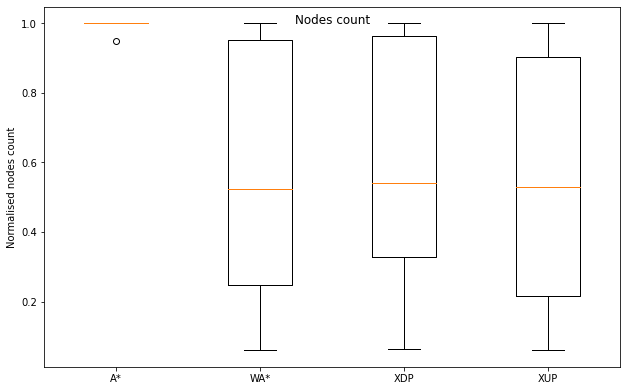

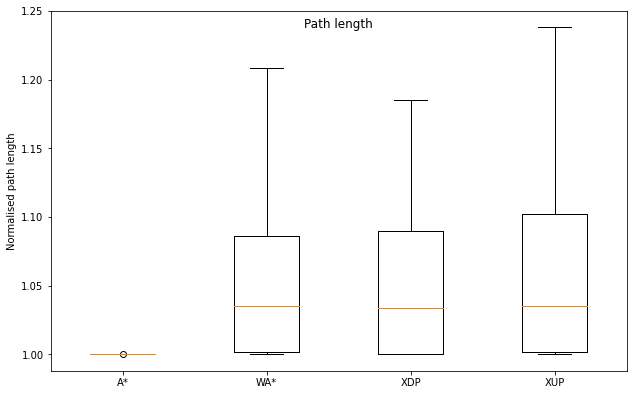

In [18]:
draw_box_plot(nodes_norm, task_lens)

In [31]:
'''
Функция, принимающая map (карта), scen (задания) и iter, и применяющая a-star к каждому iter-ому заданию по всем
доступным эвристикам. Возвращает массивы:
nodes_norm[i] - набор нормализованных значений количества вершин для всех A* и WA* с заданными весами для текущего задания
steps_norm[i] - набор нормализованных значений количества шагов для всех A* и WA* с заданными весами для текущего задания
task_hard[i] - сложность текущего задания, вычисляется как длина кратчайшего пути
nodes[i] - набор не нормализованных значений количества вершин для всех A* и WA* с заданными весами для текущего задания
steps[i] - набор не нормализованных значений количества шагов для всех A* и WA* с заданными весами для текущего задания
task_len[i] - набор нормализованных длин найденных путей для всех A* и WA* с заданными весами для текущего задания
correct_tasks - подсчитывает количество найденных кратчайших путей для A* и WA* с заданными весами
'''
def count_complexity_puzzle(w):
    nodes_norm = []
    nodes = []
    steps_norm = []
    steps = []
    task_n = 0
    task_hard = []
    task_len = []
    correct_tasks = [0, 0, 0, 0]
    
    tasks = []
    with open('Data/tasksGem.txt') as f:
        for line in f:
            tiles = list(map(int, line.split()))
            startState = GemPuzzleState(tiles)
            goalState = GemPuzzleState(range(1, len(tiles) + 1))
            tasks.append((startState, goalState))
#     weights = [1.25, 1.5, 3, 5, 10]
#     distances = [manhattan_distance, chebyshev_distance, diagonal_distance, euclidean_distance]
    for startState, goalState in tasks:
        cur_task_nodes = []
        cur_task_steps = []
        cur_task_len = []
        task_n += 1

#         result = AStar(startState, goalState, 1, SearchTreePQS, phi)
#         number_of_steps = result[2]
#         nodes_created = result[3]
#         length = result[1].g
#         correct = (length - task[8] < 0.01)
#         if correct:
#             correct_tasks[0] += 1
#         cur_task_nodes.append(nodes_created)
#         cur_task_steps.append(number_of_steps)
#         task_hard.append(length)
#         cur_task_len.append(length / task[8])

        for j in range(3):
            if j == 0:
                result = AStar(startState, goalState, w, SearchTreePQS, phi)
            if j == 1:
                result = AStar(startState, goalState, w, SearchTreePQS, phi_xdp)
            if j == 2:
                result = AStar(startState, goalState, w, SearchTreePQS, phi_xup)
            number_of_steps = result[2]
            nodes_created = result[3]
            length = result[1].g
#             correct = (length - task[8] < 0.01)
#             if correct:
#                 correct_tasks[j + 1] += 1
            cur_task_nodes.append(nodes_created)
            cur_task_steps.append(number_of_steps)
            cur_task_len.append(length)

        max_steps = max(cur_task_steps)
        max_nodes = max(cur_task_nodes)
        nodes.append(cur_task_nodes)
        steps.append(cur_task_steps)
        cur_task_nodes = [i / max_nodes for i in cur_task_nodes]
        cur_task_steps = [i / max_steps for i in cur_task_steps]
        max_len = max(cur_task_len)
        task_hard.append(min(cur_task_len))
        cur_task_len = [i / max_len for i in cur_task_len]
        task_len.append(cur_task_len)
        nodes_norm.append(cur_task_nodes)
        steps_norm.append(cur_task_steps)
        print("Going through task {}".format(task_n))
    print("Tasks: {}".format(task_n))
    return nodes_norm, steps_norm, task_hard, nodes, steps, task_len, correct_tasks

In [12]:
from puzzles_definitions import *

In [27]:
GenerateTasks('Data/tasksGem.txt', 100, 4)

In [28]:
nodes_norm, steps_norm, tasks_hard, nodes, steps, task_lens, correct_tasks = count_complexity_puzzle(2)

Going through task 1
Going through task 2
Going through task 3
Going through task 4
Going through task 5
Going through task 6
Going through task 7
Going through task 8
Going through task 9
Going through task 10
Going through task 11
Going through task 12
Going through task 13
Going through task 14
Going through task 15
Going through task 16
Going through task 17
Going through task 18
Going through task 19
Going through task 20
Going through task 21
Going through task 22
Going through task 23
Going through task 24
Going through task 25
Going through task 26
Going through task 27
Going through task 28
Going through task 29
Going through task 30
Going through task 31
Going through task 32
Going through task 33
Going through task 34
Going through task 35
Going through task 36
Going through task 37
Going through task 38
Going through task 39
Going through task 40
Going through task 41
Going through task 42
Going through task 43
Going through task 44
Going through task 45
Going through task 

In [15]:
def draw_df_puzzle(nodes_norm, steps_norm, correct_tasks, task_lens, tasks_num):
    df = pd.DataFrame(index=['correct', 'length', 'nodes_created', 'steps'])
    a_nodes = [i[0] for i in nodes_norm]
    a_steps = [i[0] for i in steps_norm]
    a_lens = [i[0] for i in task_lens]
    df["WA*"] = [
        correct_tasks[0] / tasks_num,
        np.mean(a_lens),
        np.mean(a_nodes),
        np.mean(a_steps),
    ]
    
    w_nodes = [i[1] for i in nodes_norm]
    w_steps = [i[1] for i in steps_norm]
    w_lens = [i[1] for i in task_lens]
    df["XDP"] = [
        correct_tasks[1] / tasks_num,
        np.mean(w_lens),
        np.mean(w_nodes),
        np.mean(w_steps),
    ]
    
    w_nodes = [i[2] for i in nodes_norm]
    w_steps = [i[2] for i in steps_norm]
    w_lens = [i[2] for i in task_lens]
    df["XUP"] = [
        correct_tasks[2] / tasks_num,
        np.mean(w_lens),
        np.mean(w_nodes),
        np.mean(w_steps),
    ]
    
#     w_nodes = [i[3] for i in nodes_norm]
#     w_steps = [i[3] for i in steps_norm]
#     w_lens = [i[3] for i in task_lens]
#     df["XUP"] = [
#         correct_tasks[3] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     w_nodes = [i[4] for i in nodes_norm]
#     w_steps = [i[4] for i in steps_norm]
#     w_lens = [i[4] for i in task_lens]
#     df["WA* 2"] = [
#         correct_tasks[4] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     w_nodes = [i[5] for i in nodes_norm]
#     w_steps = [i[5] for i in steps_norm]
#     w_lens = [i[5] for i in task_lens]
#     df["WA* 3"] = [
#         correct_tasks[5] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     w_nodes = [i[6] for i in nodes_norm]
#     w_steps = [i[6] for i in steps_norm]
#     w_lens = [i[6] for i in task_lens]
#     df["WA* 5"] = [
#         correct_tasks[6] / tasks_num,
#         np.mean(w_lens),
#         np.mean(w_nodes),
#         np.mean(w_steps),
#     ]
    
#     df.div(np.max(df.iloc[2]), axis = 2)
    df.iloc[2] /= np.max(df.iloc[2])
    df.iloc[3] /= np.max(df.iloc[3])
    return df.style.set_properties(**{
    'font-size': '17pt',
})
    

In [19]:
def draw_box_plot_puzzle(nodes_norm, task_lens):
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Nodes count')
    ax = fig.add_axes([0, 0, 1, 1])
    data_nodes = []
    for i in range(3):
        data_nodes.append([el[i] for el in nodes_norm])
    bp = ax.boxplot(data_nodes, labels=["WA*", "XDP", "XUP"])
    plt.ylabel('Normalised nodes count')
    plt.show()
    
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Path length')
    ax = fig.add_axes([0, 0, 1, 1])
    data_nodes = []
    for i in range(3):
        data_nodes.append([el[i] for el in task_lens])
    bp = ax.boxplot(data_nodes, labels=["WA*", "XDP", "XUP"])
    plt.ylabel('Normalised path length')
    plt.show()

In [33]:
tasks_hard

[]

In [24]:
draw_df_puzzle(nodes, steps, correct_tasks, task_lens, 100)

,WA*,XDP,XUP
correct,0.000000,0.000000,0.000000
length,0.950462,0.963342,0.931370
nodes_created,0.488860,0.376242,1.000000
steps,0.485974,0.372874,1.000000


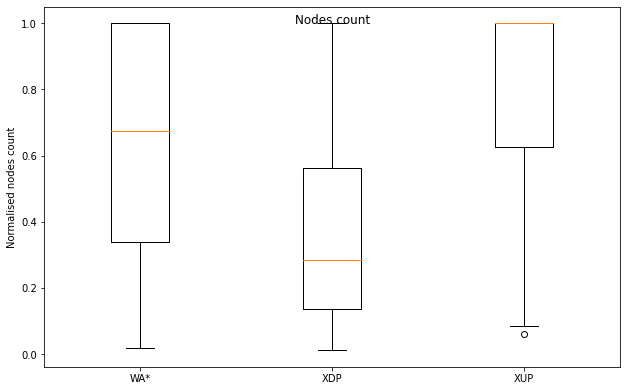

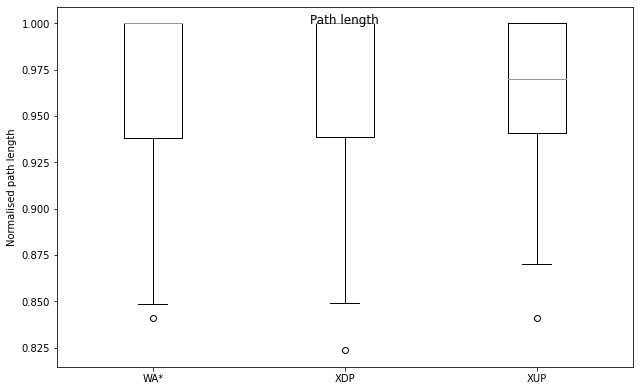

In [30]:
draw_box_plot_puzzle(nodes_norm, task_lens)